In [ ]:
# Chinese

In [1]:
# English translate to Chinese

import pandas as pd
import numpy as np

train_from_en = pd.read_csv("NTCIR-13_MedWeb_zh_from_en_amazon_training.csv")
test = pd.read_csv("NTCIR-13_MedWeb_zh_test.csv", na_values='NaN',keep_default_na=False)
test = test[:640]

# remove punctuations inside

import re
from zhon.hanzi import punctuation

def clean_text(df, text_field):
    
    df[text_field] = df[text_field].apply(lambda elem:re.sub(r'[{}]+'.format(punctuation),'',elem))
    
    return df

# update

train_from_en = clean_text(train_from_en,"Tweet")
tweet_train_from_en = list(train_from_en.Tweet)

test = clean_text(test,"Tweet")
tweet_test = list(test.Tweet)

# import tokenizer

import jieba

def tokenize_zh(text):
    words = jieba.lcut(text)
    return words

# assign labels

categories = ['Influenza','Diarrhea','Hayfever','Cough','Headache','Fever','Runnynose','Cold']

y_train = train_from_en[categories].replace({'n':0, 'p':+1})
y_test = test[categories].replace({'n':0, 'p':+1})

# BOW

from sklearn.feature_extraction.text import CountVectorizer
stop_words = ['1','100','3','32','36','38','39','40',
              'ok','了',' ',',','.','...']
vectorizer = CountVectorizer(tokenizer=tokenize_zh, stop_words=stop_words)
X_train = vectorizer.fit_transform(tweet_train_from_en).toarray()

feature = vectorizer.get_feature_names()

vectorizer_test = CountVectorizer(tokenizer=tokenize_zh, vocabulary=vectorizer.vocabulary_)
X_test = vectorizer_test.transform(tweet_test).toarray()

print("The vocabulary contains {} unique tokens".format(len(feature)))

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier


# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(C=10, solver='lbfgs', penalty='l2', max_iter=2500, class_weight='balanced'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} sysptoms...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[category].values)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print('Test precision is {}'.format(precision_score(y_test[category], prediction, average='binary')))
    print('Test recall is {}'.format(recall_score(y_test[category], prediction, average='binary')))
    print('Test f1-score is {}\n'.format(f1_score(y_test[category], prediction, average='binary')))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/xz/jrlb55l167x3c2jq466bx5fm0000gn/T/jieba.cache
Loading model cost 0.823 seconds.
Prefix dict has been built successfully.


The vocabulary contains 1993 unique tokens
**Processing Influenza sysptoms...**
Test accuracy is 0.959375
Test precision is 0.4772727272727273
Test recall is 0.875
Test f1-score is 0.6176470588235294

**Processing Diarrhea sysptoms...**
Test accuracy is 0.946875
Test precision is 0.8571428571428571
Test recall is 0.5625
Test f1-score is 0.6792452830188678

**Processing Hayfever sysptoms...**
Test accuracy is 0.925
Test precision is 0.0
Test recall is 0.0
Test f1-score is 0.0

**Processing Cough sysptoms...**
Test accuracy is 0.978125
Test precision is 0.9230769230769231
Test recall is 0.9
Test f1-score is 0.9113924050632911

**Processing Headache sysptoms...**
Test accuracy is 0.975
Test precision is 0.8426966292134831
Test recall is 0.974025974025974
Test f1-score is 0.9036144578313253

**Processing Fever sysptoms...**
Test accuracy is 0.90625
Test precision is 0.7538461538461538
Test recall is 0.5268817204301075
Test f1-score is 0.620253164556962

**Processing Runnynose sysptoms...**

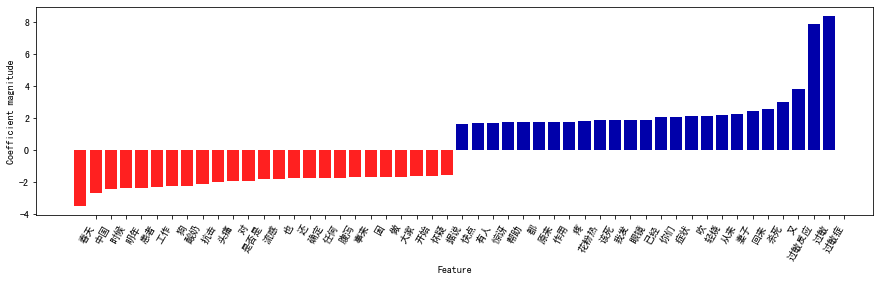

In [3]:
# check reassons for Hayfever

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10]}
grid = GridSearchCV(LogisticRegression(C=10, solver='lbfgs', penalty='l2', max_iter=2500, class_weight='balanced'), param_grid, cv=5) # scoring='roc_auc'
grid.fit(X_train, y_train["Hayfever"].values)

import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus']=False 

import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature, n_top_features=25)
plt.savefig("hayfever1ZhfromEng")

In [ ]:
# Japanese translate to Chinese

train_from_ja = pd.read_csv("NTCIR-13_MedWeb_zh_from_ja_amazon_training.csv")

# update

train_from_ja = clean_text(train_from_ja,"Tweet")
tweet_train_from_ja = list(train_from_ja.Tweet)

# BOW

from sklearn.feature_extraction.text import CountVectorizer
stop_words = ['1','100','3','32','36','38','39','40',
              'ok','了',' ',',','.','...']
vectorizer = CountVectorizer(tokenizer=tokenize_zh, stop_words=stop_words)
X_train = vectorizer.fit_transform(tweet_train_from_ja).toarray()

feature = vectorizer.get_feature_names()

vectorizer_test = CountVectorizer(tokenizer=tokenize_zh, vocabulary=vectorizer.vocabulary_)
X_test = vectorizer_test.transform(tweet_test).toarray()

print("The vocabulary contains {} unique tokens".format(len(feature)))

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier


# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(C=10, solver='lbfgs', penalty='l2', max_iter=2500, class_weight='balanced'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} sysptoms...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[category].values)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print('Test precision is {}'.format(precision_score(y_test[category], prediction, average='binary')))
    print('Test recall is {}'.format(recall_score(y_test[category], prediction, average='binary')))
    print('Test f1-score is {}\n'.format(f1_score(y_test[category], prediction, average='binary')))